In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [14]:
x,y = make_blobs(n_samples=100, centers=5, random_state=0, cluster_std=5)

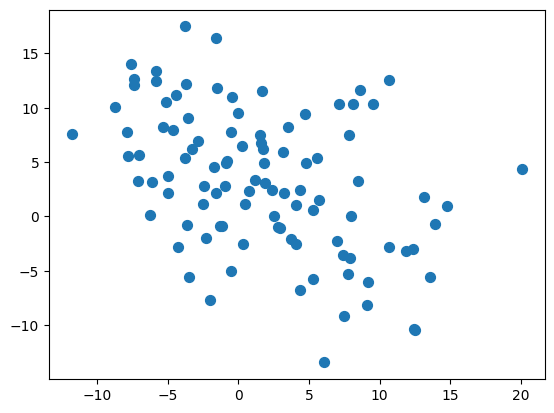

In [15]:
plt.scatter(x[:,0], x[:,1], s=50)
plt.show()

In [20]:
model = KMeans(7)
model.fit(x)
y_kmeans = model.predict(x)

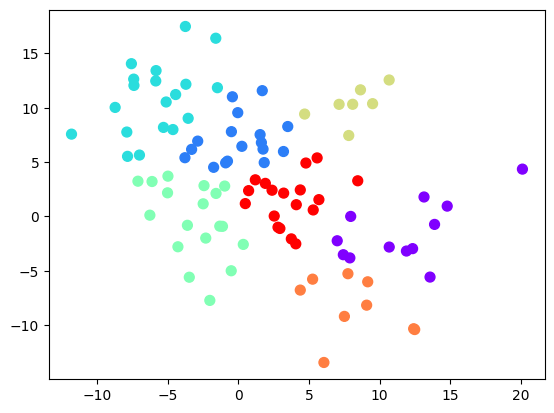

In [21]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='rainbow')

In [24]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.datasets import make_moons

In [26]:
X,y = make_moons(n_samples=1500, noise=0.05)

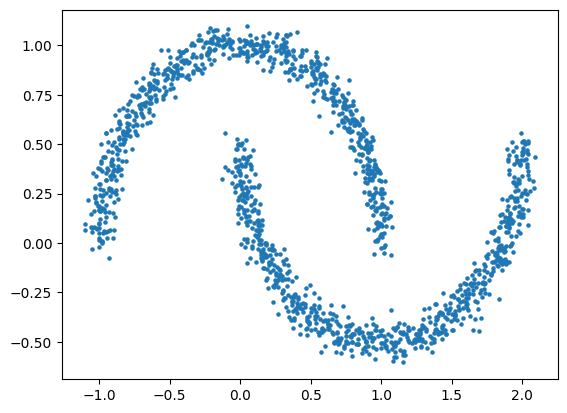

In [27]:
plt.scatter(X[:,0], X[:,1],s=5)
plt.show()

In [29]:
db = DBSCAN(eps=0.1)
db.fit(X)
y_pred = db.labels_.astype(np.int32)

In [30]:
print(y_pred)

[0 0 0 ... 1 0 0]


In [31]:
colors= np.array(['#ff0000', '#00ff00'])

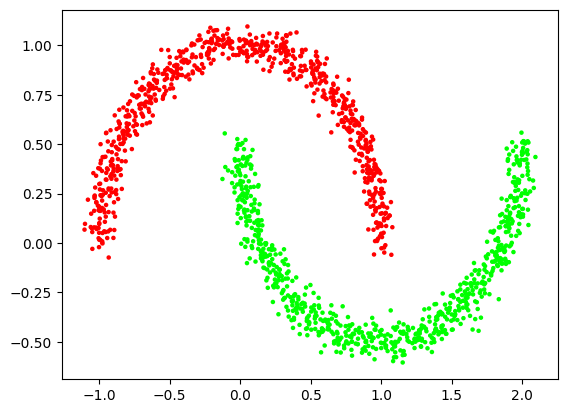

In [33]:
plt.scatter(X[:,0],X[:,1],s=5,color=colors[y_pred])

In [34]:
km = KMeans(n_clusters=2)
km.fit(X)
y_pred = km.labels_.astype(np.int32)

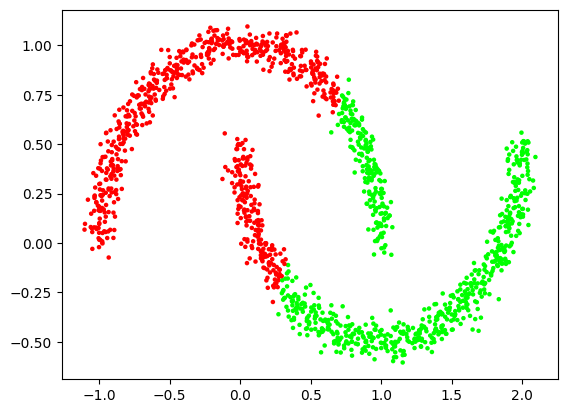

In [35]:
plt.scatter(X[:,0],X[:,1],s=5,color=colors[y_pred])

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [38]:
x = np.array([[1,1],[1.5,1],[3,3],[4,4],[3,3.5],[3.5,4]])

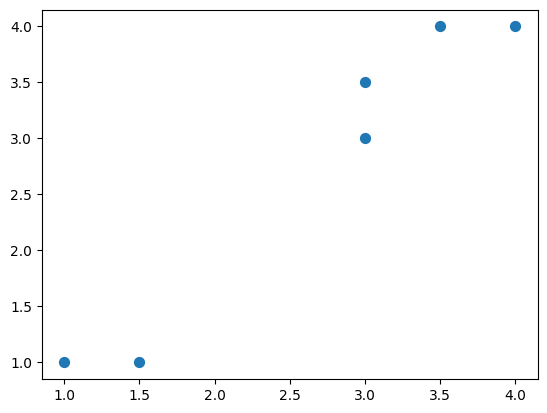

In [39]:
plt.scatter(x[:,0], x[:,1], s=50)
plt.show()

In [40]:
linkage_matrix = linkage(x,"single")

In [ ]:
x = np.array([[1,1],[1.5,1],[3,3],[4,4],[3,3.5],[3.5,4]])

In [41]:
print(linkage_matrix)

[[0.         1.         0.5        2.        ]
 [2.         4.         0.5        2.        ]
 [3.         5.         0.5        2.        ]
 [7.         8.         0.70710678 4.        ]
 [6.         9.         2.5        6.        ]]


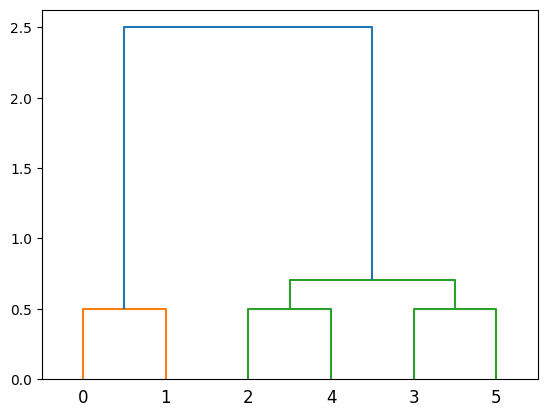

In [42]:
dendrogram = dendrogram(linkage_matrix, truncate_mode='none')

In [43]:
import pandas as pd
import scipy.cluster.hierarchy as cluster_algorithm
from sklearn.cluster import AgglomerativeClustering

In [46]:
data = pd.read_csv('data/shopping_data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
data = data.iloc[:,3:5].values

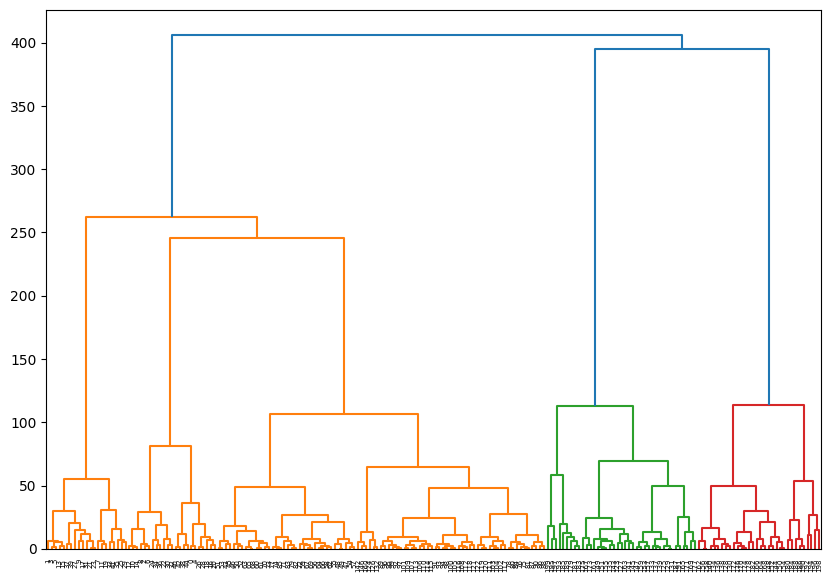

In [48]:
plt.figure(figsize=(10,7))
dendrogram = cluster_algorithm.dendrogram(cluster_algorithm.linkage(data, method='ward'))
plt.show()

In [53]:
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

In [54]:
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

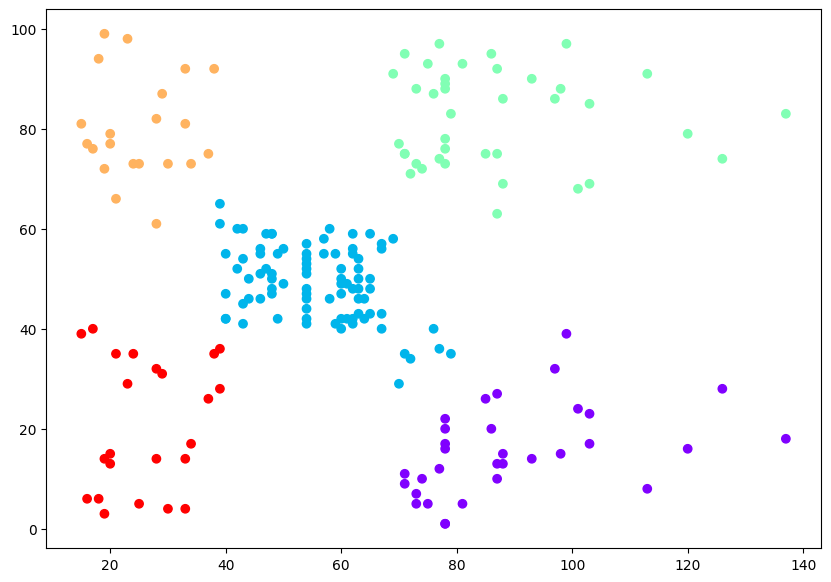

In [56]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()